# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df[pyber_data_df["type"]=="Rural"]["driver_count"]

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
totalRidesByType = pyber_data_df.groupby(["type"]).count()["ride_id"]
totalRidesByType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
totalDriversByType = pyber_data_df.groupby(["type"]).sum()["driver_count"]
totalDriversByType

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
totalFareByType = pyber_data_df.groupby(["type"]).sum()["fare"]
totalFareByType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
averageFarePerRide = pyber_data_df.groupby(["type"]).mean()["fare"]
averageFarePerRide

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
averageFarePerDriver = pyber_data_df.groupby(["type"]).mean()["fare"] / pyber_data_df.groupby(["type"]).mean()["driver_count"]
averageFarePerDriver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
indexLable = ["Total Drivers", "Total Fares", "Total Rides", "Average Fare per Driver", "Average Fare per Ride"]
pyber_summary_df = pd.concat([totalDriversByType,totalFareByType,totalRidesByType, averageFarePerDriver, averageFarePerRide], axis=1)
pyber_summary_df.columns = indexLable
pyber_summary_df

,Total Drivers,Total Fares,Total Rides,Average Fare per Driver,Average Fare per Ride
type,,,,,
Rural,537,4327.93,125,8.059460,34.623440
Suburban,8570,19356.33,625,2.258615,30.970128
Urban,59602,39854.38,1625,0.668675,24.525772


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_df

,Total Drivers,Total Fares,Total Rides,Average Fare per Driver,Average Fare per Ride
Rural,537,"$4,327.93",125,$8.06,$34.62
Suburban,8570,"$19,356.33",625,$2.26,$30.97
Urban,59602,"$39,854.38",1625,$0.67,$24.53


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df["date"].unique()

array(['2019-01-14 10:14:22', '2019-03-04 18:24:09',
       '2019-02-24 04:29:00', ..., '2019-02-10 21:03:50',
       '2019-05-07 19:22:15', '2019-04-25 10:20:13'], dtype=object)

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

weeklyFare = pd.DataFrame(pyber_data_df.groupby(["type", "date"]).sum()["fare"])
weeklyFare

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
weeklyFare = weeklyFare.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

weeklyFarePivot = weeklyFare.pivot(index="date", columns="type", values="fare")
weeklyUrbanFare = weeklyFarePivot["Urban"].sum()
weeklySuburbanFare = weeklyFarePivot["Suburban"].sum()
weeklyRuralFare = weeklyFarePivot["Rural"].sum()

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
import datetime as dt
normalizedWeeklyPivotTable = weeklyFarePivot
normalizedWeeklyPivotTable.index = pd.to_datetime(normalizedWeeklyPivotTable.index).normalize()
temp = normalizedWeeklyPivotTable.loc[(normalizedWeeklyPivotTable.index == '2019-01-01') | (normalizedWeeklyPivotTable.index == '2019-04-29')]
temp

type,Rural,Suburban,Urban
date,,,
2019-01-01,NaN,NaN,37.91
2019-01-01,NaN,47.74,NaN
2019-01-01,NaN,24.07,NaN
2019-01-01,NaN,NaN,7.57
2019-01-01,NaN,NaN,10.75
2019-01-01,43.69,NaN,NaN
2019-01-01,NaN,25.56,NaN
2019-01-01,NaN,NaN,5.42
2019-01-01,NaN,NaN,12.31


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(normalizedWeeklyPivotTable.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
normalizedWeeklyPivotTable.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 to 2019-05-08
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampledWeeklyFares = normalizedWeeklyPivotTable.resample('1w').sum()
resampledWeeklyFares

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<AxesSubplot:xlabel='Weeks', ylabel='Fare ($USD)'>

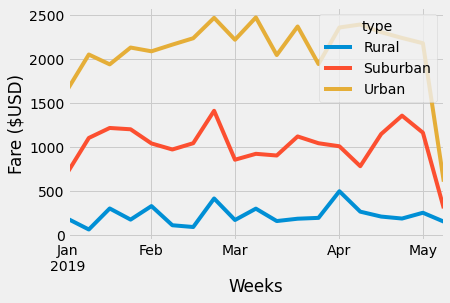

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig,ax = plt.subplots()
ax.set_ylabel("Fare ($USD)")
ax.grid()
ax.legend("City Type")
resampledWeeklyFares.plot(ax=ax, xlabel="Weeks")
